In [20]:
pip install networkx -U

  Attempting uninstall: networkx
    Found existing installation: networkx 2.4
    Uninstalling networkx-2.4:
      Successfully uninstalled networkx-2.4



You should consider upgrading via the 'C:\Users\kevin\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [89]:
import networkx as nx
import matplotlib.pyplot as plt
import os

In [90]:
file_path = r"C:\Users\kevin\Documents\jupyter notebooks\memgraph"

In [2]:
# https://github.com/memgraph/graph-analytics-course/blob/master/dataset/graph-schema/graph.graphml

G = nx.read_graphml(r'C:\Users\kevin\Documents\jupyter notebooks\memgraph\graph.graphml')

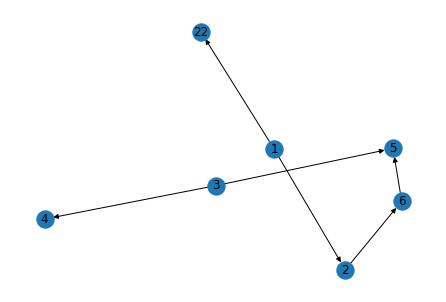

In [3]:

nx.draw(G, with_labels=True)
plt.show()

In [4]:
G.nodes()

NodeView(('1', '2', '3', '4', '5', '6', '22'))

In [5]:
G.nodes['22']

{'label': 'SocialMedia',
 'username': 'john_doe',
 'platform': 'Facebook',
 'followers': 2000}

In [6]:
node_labels = list(G.nodes())
node_labels

['1', '2', '3', '4', '5', '6', '22']

In [7]:
# 1 = person
# 2 = credit card
# 6 = transaction
# 5 = pos
# 22 = Social Media
# 3 = Store
# 4 = category

node_names = ['Person', 'Credit Card', 'Store', 'Category', 'Pos', 'Transaction', 'Social Media']

node_name_dict = {label: name for label, name in zip(node_labels, node_names)}

nx.set_node_attributes(G, name='name', values=node_name_dict)

In [7]:
G.nodes['22']

{'label': 'SocialMedia',
 'username': 'john_doe',
 'platform': 'Facebook',
 'followers': 2000}

In [8]:
for node in node_labels:
    print(G.nodes[node])
    print(' ')

{'label': 'Person', 'name': 'John Doe', 'age': 40}
 
{'label': 'CreditCard', 'name': 'Visa', 'compromised': False}
 
{'label': 'Store', 'name': 'Walmart'}
 
{'label': 'Category', 'name': 'Grocery store'}
 
{'label': 'Pos', 'compromised': False}
 
{'label': 'Transaction', 'fraudReported': False}
 
{'label': 'SocialMedia', 'username': 'john_doe', 'platform': 'Facebook', 'followers': 2000}
 


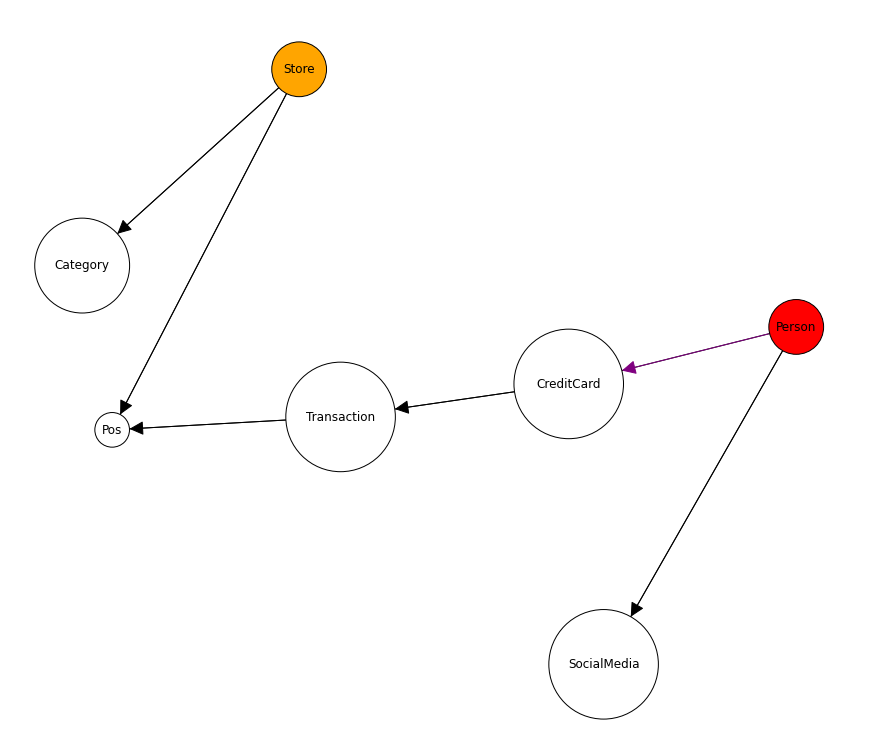

In [91]:
plt.figure(1,figsize=(12,10)) 

pos = nx.kamada_kawai_layout(G)

nx.draw(G, pos)
node_names = nx.get_node_attributes(G,'label')

# set color
color_map = []
for node in G:
    if G.nodes[node]['label'] == 'Person':
        color_map.append('red')
    elif G.nodes[node]['label'] == 'Store':
        color_map.append('orange')
    else:
        color_map.append('white')

default_node_size = 600

node_sizes = [ 5  * default_node_size,
              20 * default_node_size,
             5  * default_node_size,
             15  * default_node_size,
             2  * default_node_size,
             20  * default_node_size,
             20  * default_node_size]

edge_colors = []

for edge in G.edges():
    if edge == ('1', '2'):
        edge_colors.append('purple')
    else:
        edge_colors.append('black')

nx.draw_networkx_nodes(G, pos, edgecolors = 'black', node_color=color_map, node_size=node_sizes)
nx.draw_networkx_edges(G, pos, arrowsize=30, edge_color = edge_colors, node_size=node_sizes)
nx.draw_networkx_labels(G, pos, labels = node_names)

#nx.draw_networkx(G, pos, arrowsize=20, node_size=node_sizes, node_color=color_map, labels=node_names)
plt.savefig(os.path.join(file_path, "hw 2 gpraph.png"), format="PNG")
plt.show()
    

In [41]:
G.edges()

OutEdgeView([('1', '2'), ('1', '22'), ('2', '6'), ('3', '4'), ('3', '5'), ('6', '5')])

In [67]:
for node in G.nodes():
    print(node, ": ", G.nodes[node]['label'])

1 :  Person
2 :  CreditCard
3 :  Store
4 :  Category
5 :  Pos
6 :  Transaction
22 :  SocialMedia


In [66]:
for edge in G.edges():
    print(edge, ": ", G.edges[edge])

('1', '2') :  {'type': 'OWNS'}
('1', '22') :  {'type': 'HAS_ACCOUNT'}
('2', '6') :  {'type': 'HAS_TRANSACTION'}
('3', '4') :  {'type': 'IS_OF_CATEGORY'}
('3', '5') :  {'type': 'HAS_POS_DEVICE'}
('6', '5') :  {'type': 'TRANSACTION_AT'}


In [24]:
node_size

[250, 1000, 250, 750, 100, 1000, 1000]